# ABC-XYZ Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from DataSCM import abc_xyz_analysis as abc_xyz

In [2]:
raw_data = pd.read_csv('online_retail2.csv')
raw_data['sales'] = raw_data['Quantity'] * raw_data['Price']
raw_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
 8   sales        1067371 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 73.3+ MB


In [4]:
for_abc_xyz = raw_data[['StockCode', 'sales', 'InvoiceDate']]
for_abc_xyz

,StockCode,sales,InvoiceDate
0,85048,83.40,2009-12-01 07:45:00
1,79323P,81.00,2009-12-01 07:45:00
2,79323W,81.00,2009-12-01 07:45:00
3,22041,100.80,2009-12-01 07:45:00
4,21232,30.00,2009-12-01 07:45:00
...,...,...,...
1067366,22899,12.60,2011-12-09 12:50:00
1067367,23254,16.60,2011-12-09 12:50:00
1067368,23255,16.60,2011-12-09 12:50:00
1067369,22138,14.85,2011-12-09 12:50:00


In [5]:
sku_abcxyz = abc_xyz(df = for_abc_xyz )
sku_abcxyz

Exception:  All values of the 2nd column must be positive

In [6]:
raw_data = raw_data[raw_data.Quantity > 0]
raw_data = raw_data[raw_data.Price > 0]
raw_data['sales'] = raw_data['Quantity'] * raw_data['Price']
for_abc_xyz = raw_data[['StockCode', 'sales', 'InvoiceDate']].copy()

In [7]:
sku_abcxyz = abc_xyz(df = for_abc_xyz )
sku_abcxyz

AttributeError: Can only use .dt accessor with datetimelike values

In [8]:
for_abc_xyz['InvoiceDate'] = pd.to_datetime(for_abc_xyz['InvoiceDate'])

In [9]:
for_abc_xyz['year'] = for_abc_xyz['InvoiceDate'].dt.year.astype('str')
for_abc_xyz['month'] = for_abc_xyz['InvoiceDate'].dt.month.astype('str')
for_abc_xyz['time_unit'] = for_abc_xyz['year'] + '-' + for_abc_xyz['month']
for_abc_xyz

,StockCode,sales,InvoiceDate,year,month,time_unit
0,85048,83.40,2009-12-01 07:45:00,2009,12,2009-12
1,79323P,81.00,2009-12-01 07:45:00,2009,12,2009-12
2,79323W,81.00,2009-12-01 07:45:00,2009,12,2009-12
3,22041,100.80,2009-12-01 07:45:00,2009,12,2009-12
4,21232,30.00,2009-12-01 07:45:00,2009,12,2009-12
...,...,...,...,...,...,...
1067366,22899,12.60,2011-12-09 12:50:00,2011,12,2011-12
1067367,23254,16.60,2011-12-09 12:50:00,2011,12,2011-12
1067368,23255,16.60,2011-12-09 12:50:00,2011,12,2011-12
1067369,22138,14.85,2011-12-09 12:50:00,2011,12,2011-12


In [10]:
grp_abc_xyz = for_abc_xyz.groupby(['StockCode','time_unit']).sales.sum().reset_index()
grp_abc_xyz

,StockCode,time_unit,sales
0,10002,2009-12,186.15
1,10002,2010-1,248.97
2,10002,2010-10,794.82
3,10002,2010-11,755.19
4,10002,2010-12,385.80
...,...,...,...
67055,gift_0001_80,2009-12,69.56
67056,m,2010-12,2.55
67057,m,2010-2,5.95
67058,m,2010-4,4.00


In [11]:
pivot_abc_xyz = grp_abc_xyz.pivot('StockCode','time_unit','sales')
pivot_abc_xyz.fillna(0, inplace=True)
pivot_abc_xyz

time_unit,2009-12,2010-1,2010-10,2010-11,2010-12,2010-2,2010-3,2010-4,2010-5,2010-6,...,2011-11,2011-12,2011-2,2011-3,2011-4,2011-5,2011-6,2011-7,2011-8,2011-9
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,186.15,248.97,794.82,755.19,385.80,220.07,493.94,843.73,1157.49,404.20,...,0.00,0.00,45.76,27.70,160.65,0.00,0.00,0.00,0.00,0.0
10002R,15.51,5.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
10080,3.40,0.00,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,...,35.49,0.00,1.70,0.00,0.00,0.00,23.40,9.36,23.40,23.4
10109,1.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
10120,26.13,6.94,14.91,15.75,6.51,2.15,14.28,12.60,0.84,6.30,...,10.29,1.26,6.30,6.09,0.00,0.63,0.00,1.05,7.35,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gift_0001_40,0.00,0.00,34.04,0.00,34.04,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,33.33,0.00,0.00,33.33,0.00,0.0
gift_0001_50,43.48,0.00,42.55,0.00,42.55,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,41.67,83.34,0.00,0.00,0.0
gift_0001_70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,59.57,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [12]:
abc_xyz_data = raw_data[['StockCode', 'sales', 'InvoiceDate']].copy()
abc_xyz_data['InvoiceDate'] = pd.to_datetime(abc_xyz_data['InvoiceDate'])
sku_abcxyz = abc_xyz(df = abc_xyz_data)
sku_abcxyz

,StockCode,sales,norm_CV,abc_cat,xyz_cat,abc_xyz_cat
0,22423,344563.250,0.079675,A,X,AX
1,M,341089.850,0.196651,A,Y,AY
2,DOT,322657.480,0.079154,A,X,AX
3,85123A,263109.670,0.025617,A,X,AX
4,85099B,183454.830,0.014091,A,X,AX
...,...,...,...,...,...,...
4912,20721,0.850,1.000000,C,Z,CZ
4913,51014c,0.830,1.000000,C,Z,CZ
4914,84205C,0.380,1.000000,C,Z,CZ
4915,35930,0.380,1.000000,C,Z,CZ


In [13]:
sku_abcxyz.abc_xyz_cat.value_counts(normalize=True) *100

CZ    51.271100
CY    24.425463
BY     7.301200
BX     4.982713
BZ     4.840350
CX     3.884482
AX     1.789709
AY     0.935530
AZ     0.569453
Name: abc_xyz_cat, dtype: float64

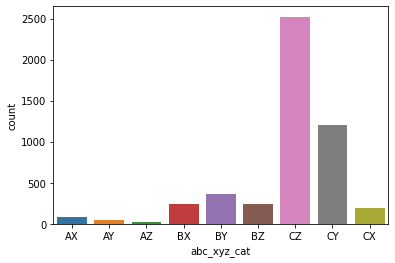

In [14]:
sns.countplot(x='abc_xyz_cat',data=sku_abcxyz);

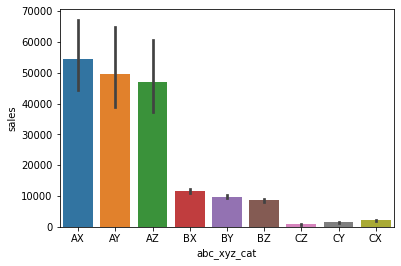

In [15]:
sns.barplot(x='abc_xyz_cat',y='sales',data=sku_abcxyz);

In [16]:
group = sku_abcxyz.groupby(['abc_cat','xyz_cat']).StockCode.count().reset_index()
abcxyz_matrix = group.pivot(index='abc_cat',columns='xyz_cat', values='StockCode')
abcxyz_matrix

xyz_cat,X,Y,Z
abc_cat,,,
A,88,46,28
B,245,359,238
C,191,1201,2521


In [17]:
sns.scatterplot(data=abcxyz_matrix,x='abc_cat' , y='xyz_cat')

ValueError: Could not interpret value `xyz_cat` for parameter `y`